In [1]:
import ROOT
import numpy as np
from utils.agc_sample import AGC_Sample
from utils.rebinning_tool import RebinningTool
from utils.extra import MuteTool
from utils.drawer import Visualization, DrawModel

result_file = ROOT.TFile("fitResults.root", "READ")

# Retrieve the fit result from the file
fit_result = result_file.Get("fitResult") 

input_file = "data/histograms_ml.root" # input file for futher defined histograms

/home/valerii/Documents/IRIS/root_agc_upgrade/utils/agc_sample.py:5: RuntimeWarning: class "RooStats::HistFactory::Sample" has no virtual destructor
  class AGC_Sample(ROOT.RooStats.HistFactory.Sample):


In [2]:
def draw_extra_variable_plot(variable_name):
    meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
    meas.SetLumi(1.0)
    meas.SetLumiRelErr(0.0)

    # ! main difference
    lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
    lumi_systematics.SetName("Lumi")
    lumi_systematics.SetLow(0.97)
    lumi_systematics.SetHigh(1.03)

    channel = ROOT.RooStats.HistFactory.Channel("channel_" + variable_name)
    channel.SetData(variable_name + "_pseudodata", input_file)
    channel.SetStatErrorConfig(0.001, "Gaussian")

    ttbar = AGC_Sample("ttbar", variable_name + "_ttbar", input_file)
    ttbar.SetSystematicsInputFile(input_file)   

    ttbar.AddOverallSys(lumi_systematics)
    ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
    ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = variable_name + "_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
    ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = variable_name + "_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
    ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = variable_name + "_ttbar_scaleup",        histoname_down = variable_name + "_ttbar_scaledown"         )
    ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = variable_name + "_ttbar_pt_scale_up"                                                     )
    ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = variable_name + "_ttbar_pt_res_up"                                                       )
    ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = variable_name + "_ttbar_btag_var_0_up",  histoname_down = variable_name + "_ttbar_btag_var_0_down"   )
    ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = variable_name + "_ttbar_btag_var_1_up",  histoname_down = variable_name + "_ttbar_btag_var_1_down"   )
    ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = variable_name + "_ttbar_btag_var_2_up",  histoname_down = variable_name + "_ttbar_btag_var_2_down"   )
    ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = variable_name + "_ttbar_btag_var_3_up",  histoname_down = variable_name + "_ttbar_btag_var_3_down"   )
    ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
    channel.AddSample(ttbar)

    wjets = AGC_Sample("wjets", variable_name + "_wjets", input_file)
    wjets.SetSystematicsInputFile(input_file)
    wjets.ActivateStatError()
    wjets.AddOverallSys(lumi_systematics)
    wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = variable_name + "_wjets_pt_scale_up"                                                     )
    wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = variable_name + "_wjets_pt_res_up"                                                       )
    wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = variable_name + "_wjets_btag_var_0_up",  histoname_down = variable_name + "_wjets_btag_var_0_down"   )
    wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = variable_name + "_wjets_btag_var_1_up",  histoname_down = variable_name + "_wjets_btag_var_1_down"   )
    wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = variable_name + "_wjets_btag_var_2_up",  histoname_down = variable_name + "_wjets_btag_var_2_down"   )
    wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = variable_name + "_wjets_btag_var_3_up",  histoname_down = variable_name + "_wjets_btag_var_3_down"   )
    wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = variable_name + "_wjets_scale_var_up",   histoname_down = variable_name + "_wjets_scale_var_down"    )
    channel.AddSample(wjets)

    single_top_s_chan = AGC_Sample("single_top_s", variable_name + "_single_top_s_chan", input_file)
    single_top_s_chan.SetSystematicsInputFile(input_file)
    single_top_s_chan.ActivateStatError()
    single_top_s_chan.AddOverallSys(lumi_systematics)
    single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = variable_name + "_single_top_s_chan_pt_scale_up"                                                                 )
    single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = variable_name + "_single_top_s_chan_pt_res_up"                                                                   )
    single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = variable_name + "_single_top_s_chan_btag_var_0_up",  histoname_down = variable_name + "_single_top_s_chan_btag_var_0_down"   )
    single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = variable_name + "_single_top_s_chan_btag_var_1_up",  histoname_down = variable_name + "_single_top_s_chan_btag_var_1_down"   )
    single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = variable_name + "_single_top_s_chan_btag_var_2_up",  histoname_down = variable_name + "_single_top_s_chan_btag_var_2_down"   )
    single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = variable_name + "_single_top_s_chan_btag_var_3_up",  histoname_down = variable_name + "_single_top_s_chan_btag_var_3_down"   )

    channel.AddSample(single_top_s_chan)

    single_top_t_chan = AGC_Sample("single_top_t", variable_name + "_single_top_t_chan", input_file)
    single_top_t_chan.SetSystematicsInputFile(input_file)
    single_top_t_chan.ActivateStatError()
    single_top_t_chan.AddOverallSys(lumi_systematics)
    single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = variable_name + "_single_top_t_chan_pt_scale_up"                                                              )
    single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = variable_name + "_single_top_t_chan_pt_res_up"                                                                )
    single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = variable_name + "_single_top_t_chan_btag_var_0_up",  histoname_down = variable_name + "_single_top_t_chan_btag_var_0_down")
    single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = variable_name + "_single_top_t_chan_btag_var_1_up",  histoname_down = variable_name + "_single_top_t_chan_btag_var_1_down")
    single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = variable_name + "_single_top_t_chan_btag_var_2_up",  histoname_down = variable_name + "_single_top_t_chan_btag_var_2_down")
    single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = variable_name + "_single_top_t_chan_btag_var_3_up",  histoname_down = variable_name + "_single_top_t_chan_btag_var_3_down")

    channel.AddSample(single_top_t_chan)

    single_top_tW = AGC_Sample("single_top_tW", variable_name + "_single_top_tW", input_file)
    single_top_tW.SetSystematicsInputFile(input_file)
    single_top_tW.ActivateStatError()
    single_top_tW.AddOverallSys(lumi_systematics)
    single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = variable_name + "_single_top_tW_pt_scale_up"                                                                 )
    single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  variable_name + "_single_top_tW_pt_res_up"                                                                  )               
    single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = variable_name + "_single_top_tW_btag_var_0_up",      histoname_down = variable_name + "_single_top_tW_btag_var_0_down"   )
    single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = variable_name + "_single_top_tW_btag_var_1_up",      histoname_down = variable_name + "_single_top_tW_btag_var_1_down"   )
    single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = variable_name + "_single_top_tW_btag_var_2_up",      histoname_down = variable_name + "_single_top_tW_btag_var_2_down"   )
    single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = variable_name + "_single_top_tW_btag_var_3_up",      histoname_down = variable_name + "_single_top_tW_btag_var_3_down"   )

    channel.AddSample(single_top_tW)

    meas.AddChannel(channel)

    meas.SetPOI("ttbar_norm")
    meas.CollectHistograms()
    meas.SetExportOnly(True)


    ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

    return meas, ws

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_leptonbtoplep_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_leptonbtoplep_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram d

Info in <TCanvas::Print>: png file channel_deltar_leptonbtoplep_histo.png has been created


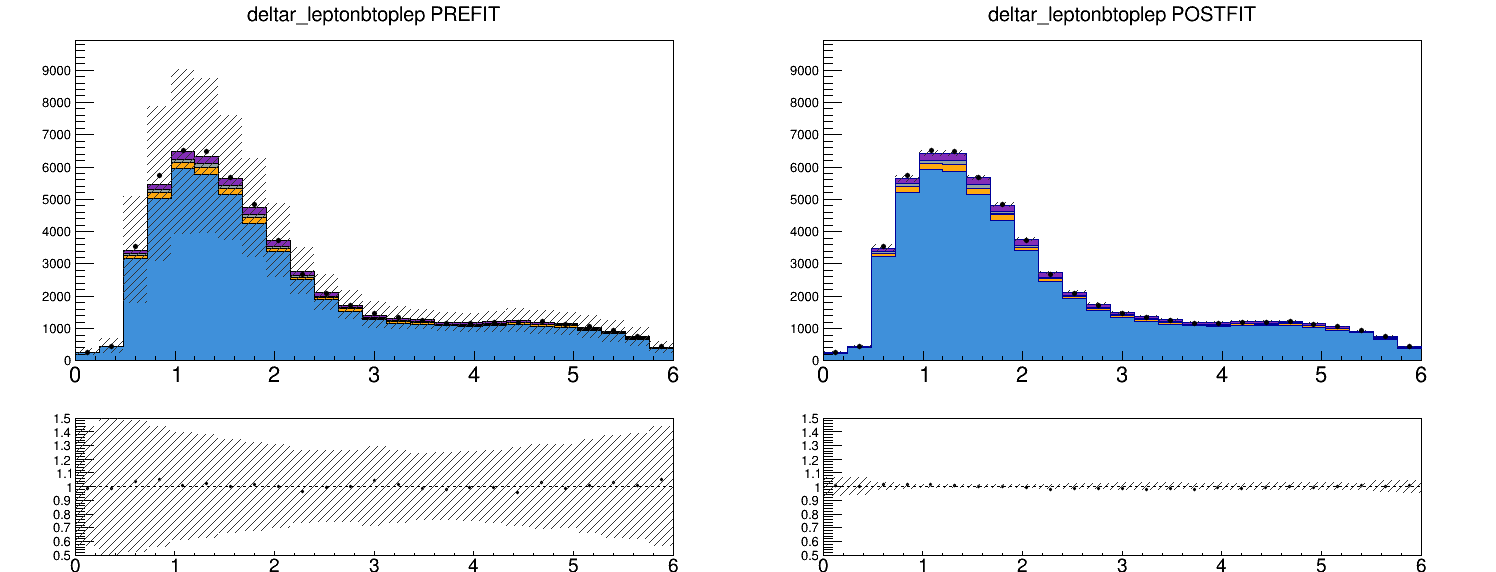

In [21]:
meas, ws = draw_extra_variable_plot("deltar_leptonbtoplep")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_w1w2_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_w1w2_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExt

Info in <TCanvas::Print>: png file channel_deltar_w1w2_histo.png has been created


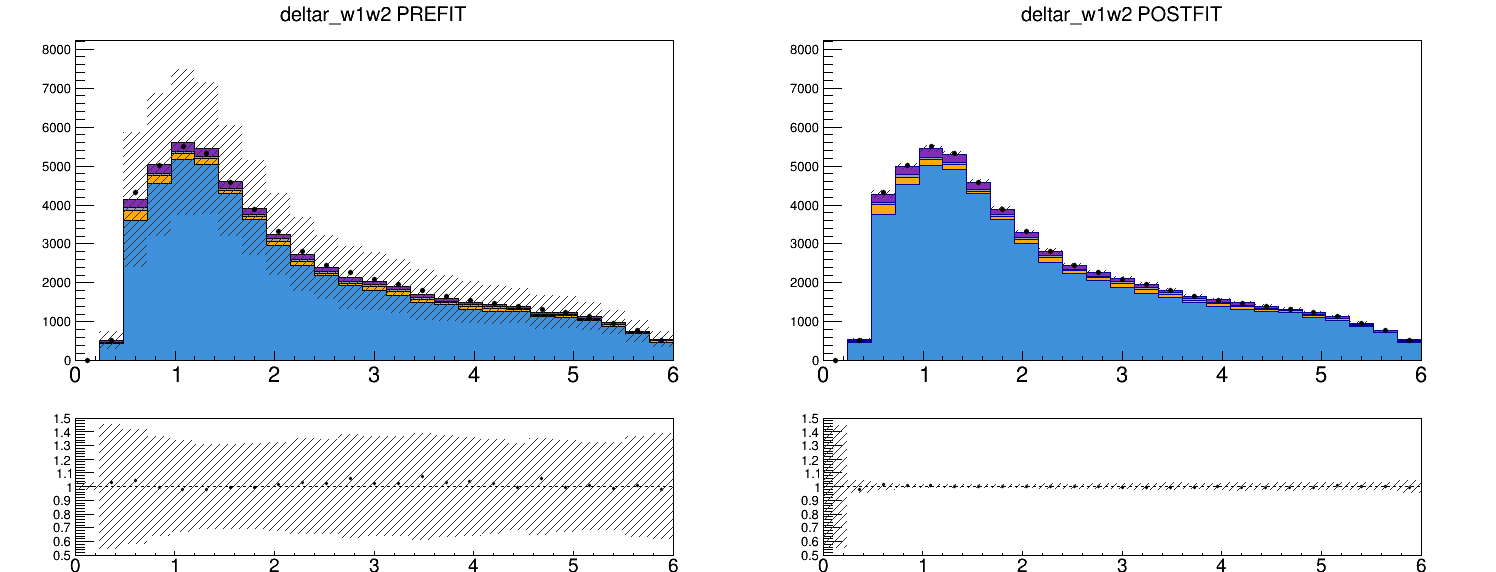

In [3]:
meas, ws = draw_extra_variable_plot("deltar_w1w2")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_w1btophad_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_w1btophad_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/Hist

Info in <TCanvas::Print>: png file channel_deltar_w1btophad_histo.png has been created


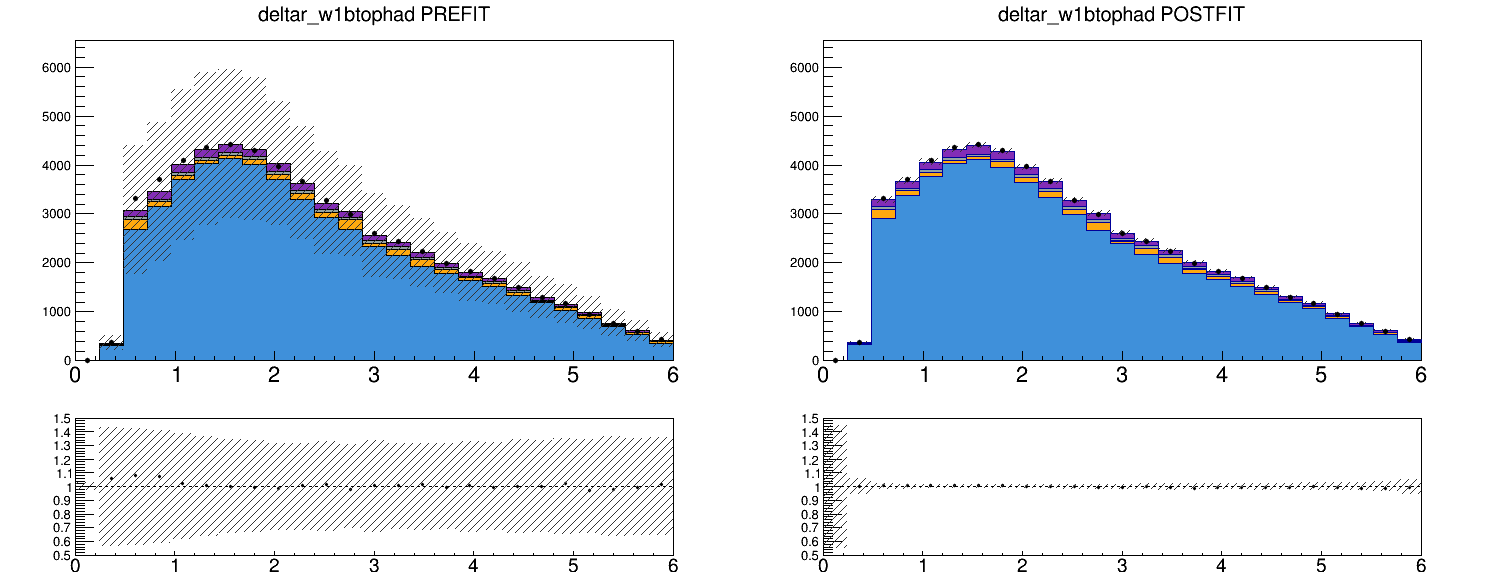

In [4]:
meas, ws = draw_extra_variable_plot("deltar_w1btophad")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

In [5]:
meas, ws = draw_extra_variable_plot("deltar_w1btophad")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_w1btophad_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/deltar_w1btophad_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/deltar_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/Hist

Warning in <TROOT::Append>: Replacing existing TH1: deltar_w1btophadafterfit0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: deltar_w1btophadafterfit1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: deltar_w1btophadafterfit2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: deltar_w1btophadafterfit3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: deltar_w1btophadafterfit4 (Potential memory leak).
Info in <TCanvas::Print>: png file channel_deltar_w1btophad_histo.png has been created


[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/mass_leptonbtoplep_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/mass_leptonbtoplep_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactor

Info in <TCanvas::Print>: png file channel_mass_leptonbtoplep_histo.png has been created


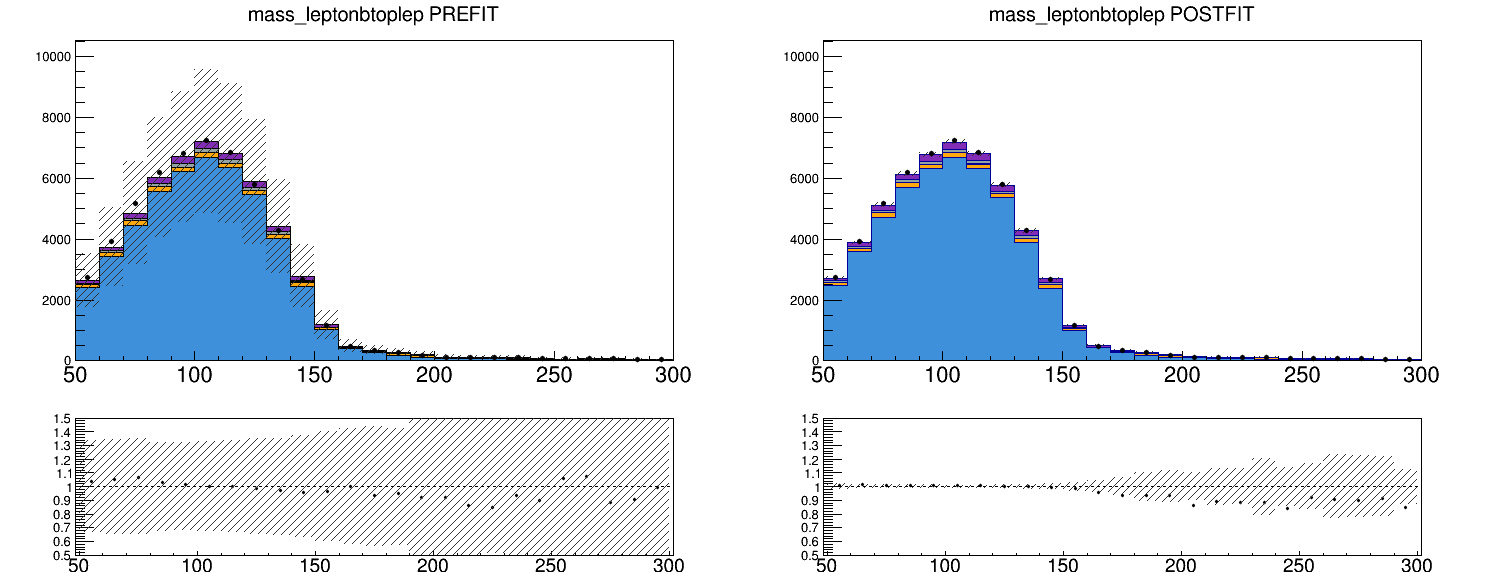

In [6]:
meas, ws = draw_extra_variable_plot("mass_leptonbtoplep")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/mass_w1w2_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/mass_w1w2_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_

Info in <TCanvas::Print>: png file channel_mass_w1w2_histo.png has been created


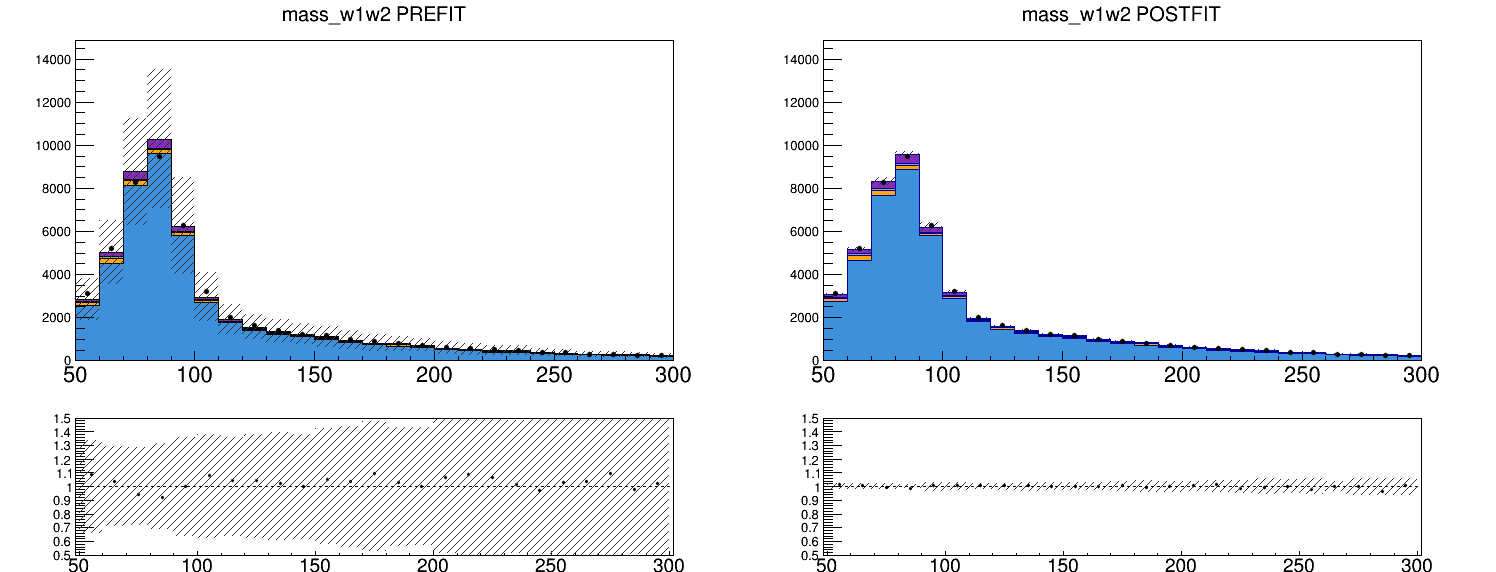

In [7]:
meas, ws = draw_extra_variable_plot("mass_w1w2")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/mass_w1w2btophad_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/mass_w1w2btophad_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/mass_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExt

Info in <TCanvas::Print>: png file channel_mass_w1w2btophad_histo.png has been created


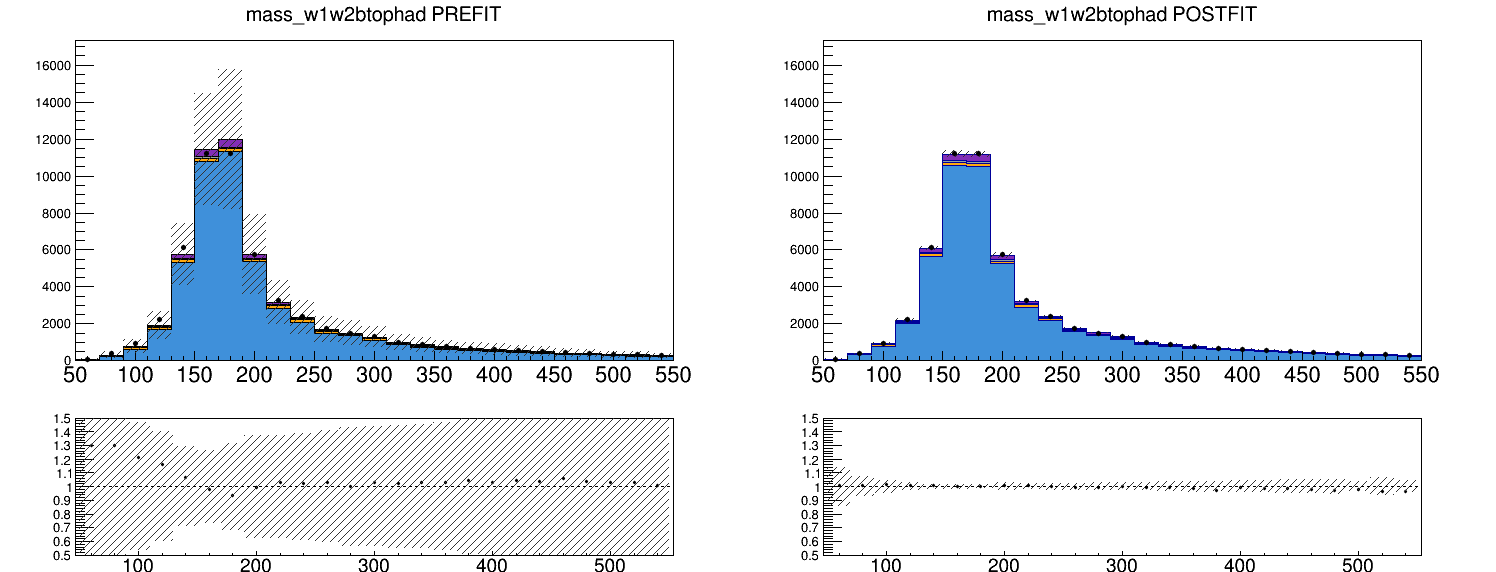

In [8]:
meas, ws = draw_extra_variable_plot("mass_w1w2btophad")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/pt_w1_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/pt_w1_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_tt_scale_var_n

Info in <TCanvas::Print>: png file channel_pt_w1_histo.png has been created


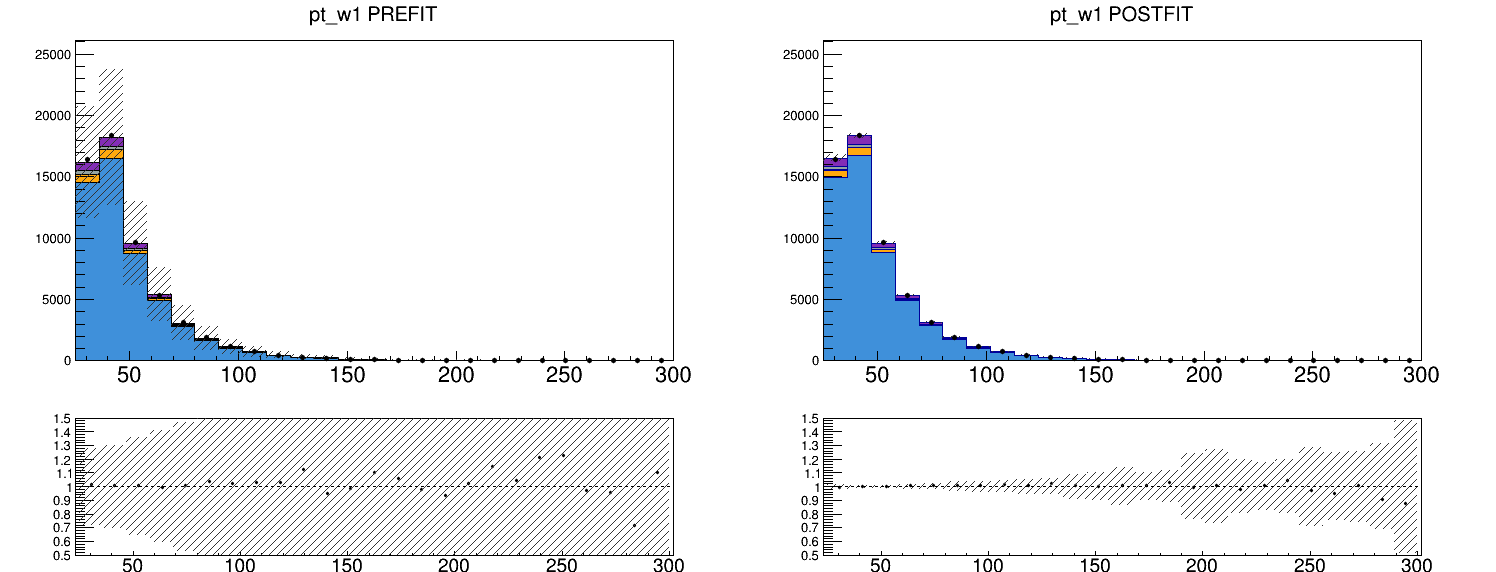

In [9]:
meas, ws = draw_extra_variable_plot("pt_w1")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/pt_w2_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/pt_w2_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_tt_scale_var_n

Info in <TCanvas::Print>: png file channel_pt_w2_histo.png has been created


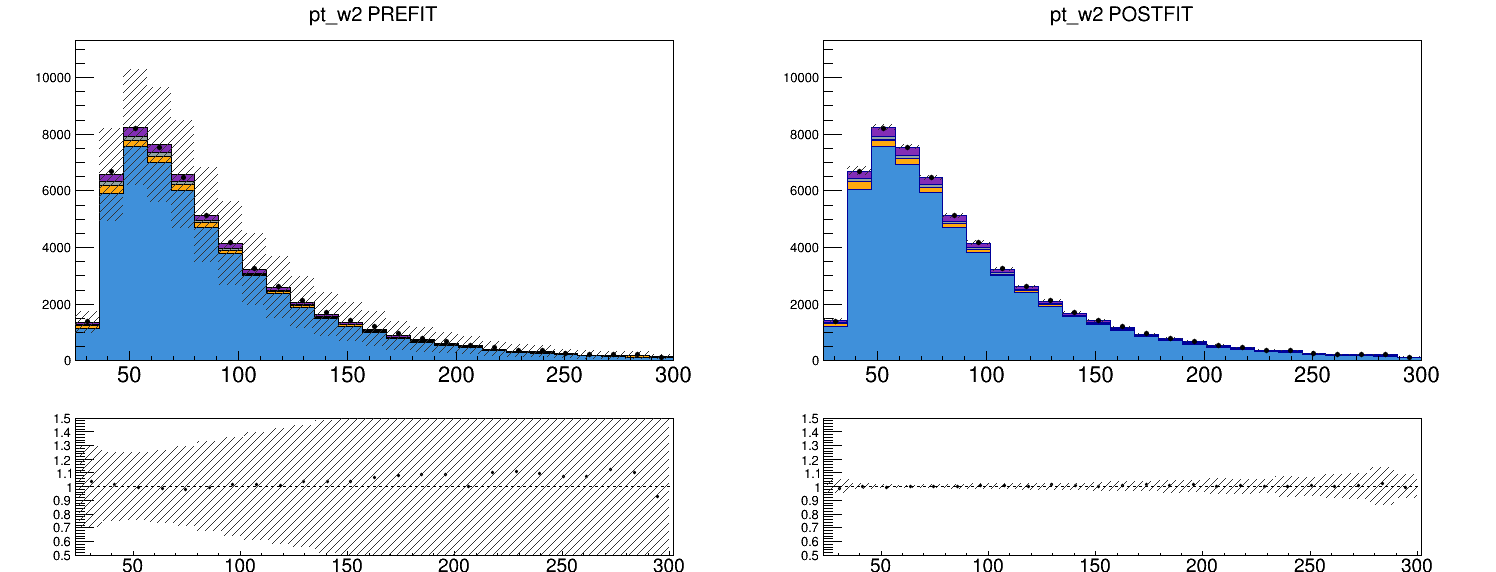

In [10]:
meas, ws = draw_extra_variable_plot("pt_w2")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/pt_btophad_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/pt_btophad_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_tt_s

Info in <TCanvas::Print>: png file channel_pt_btophad_histo.png has been created


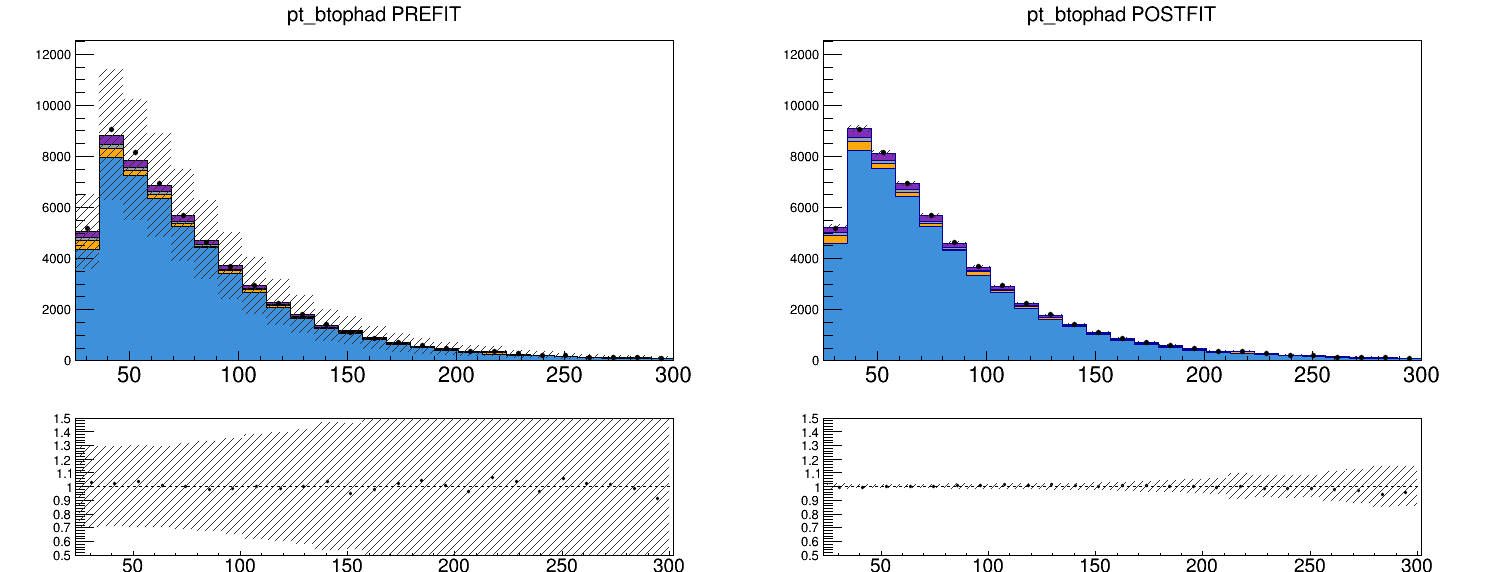

In [11]:
meas, ws = draw_extra_variable_plot("pt_btophad")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/pt_btoplep_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/pt_btoplep_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/pt_ttbar_tt_s

Info in <TCanvas::Print>: png file channel_pt_btoplep_histo.png has been created


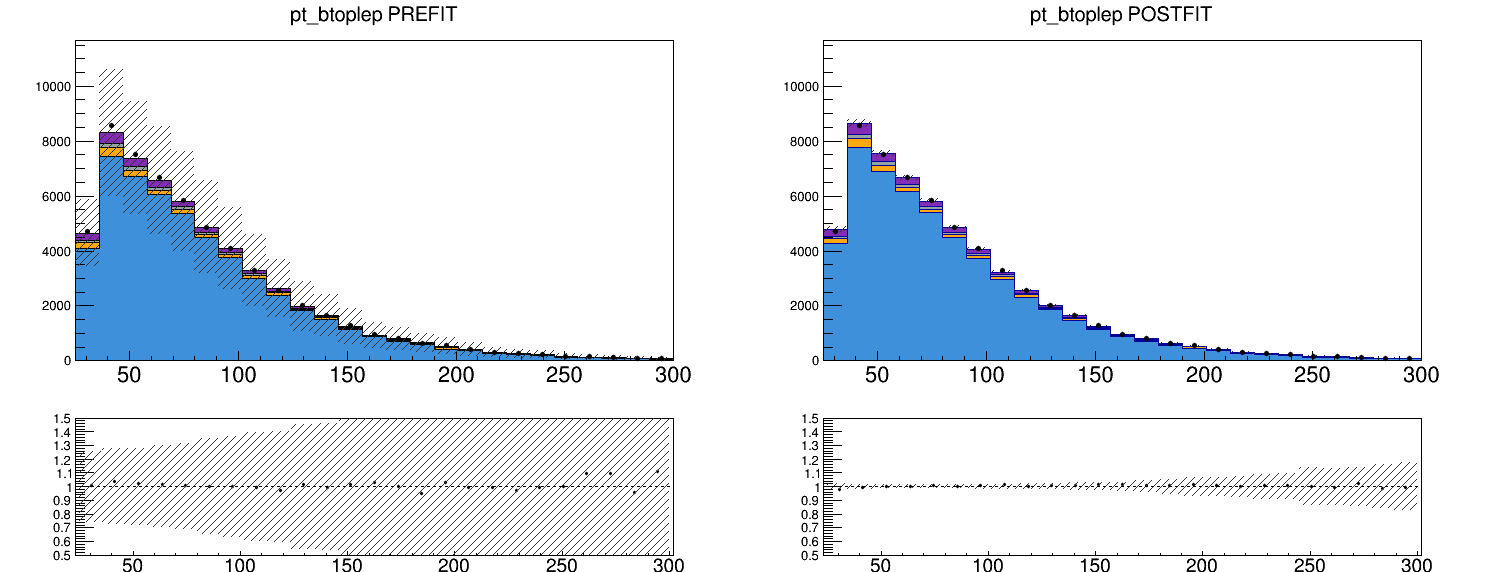

In [12]:
meas, ws = draw_extra_variable_plot("pt_btoplep")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/btag_w1_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/btag_w1_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttba

Info in <TCanvas::Print>: png file channel_btag_w1_histo.png has been created


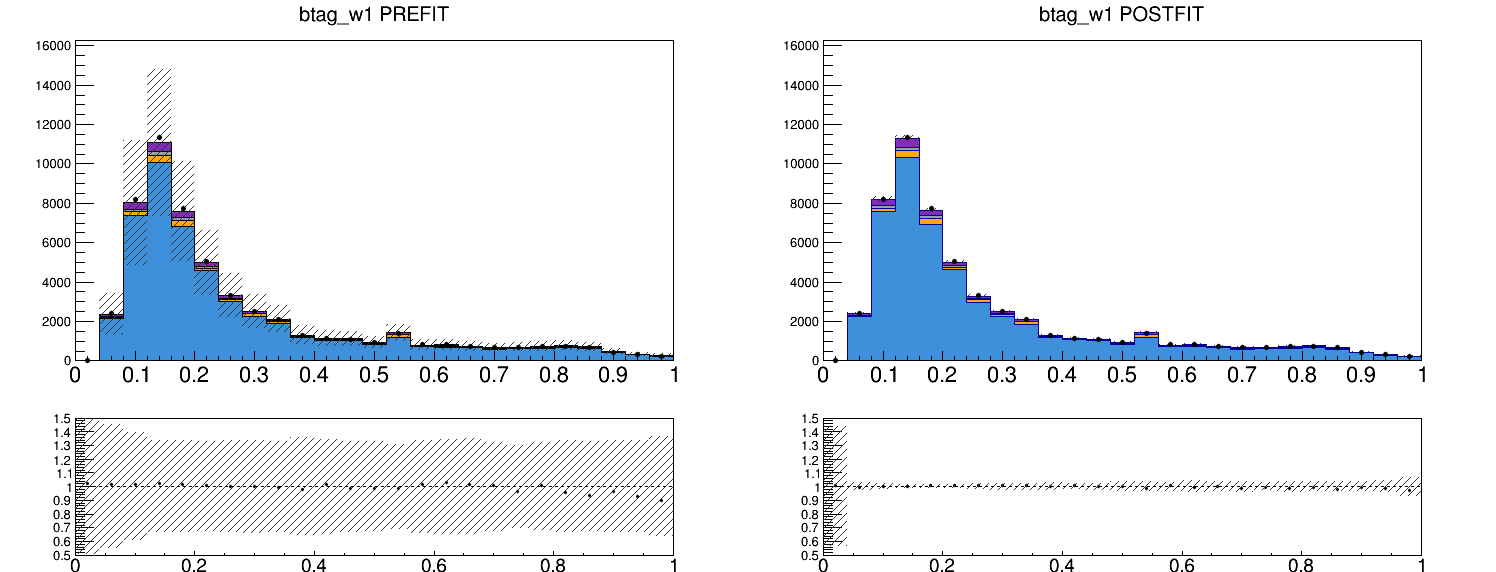

In [13]:
meas, ws = draw_extra_variable_plot("btag_w1")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/btag_w2_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/btag_w2_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttba

Info in <TCanvas::Print>: png file channel_btag_w2_histo.png has been created


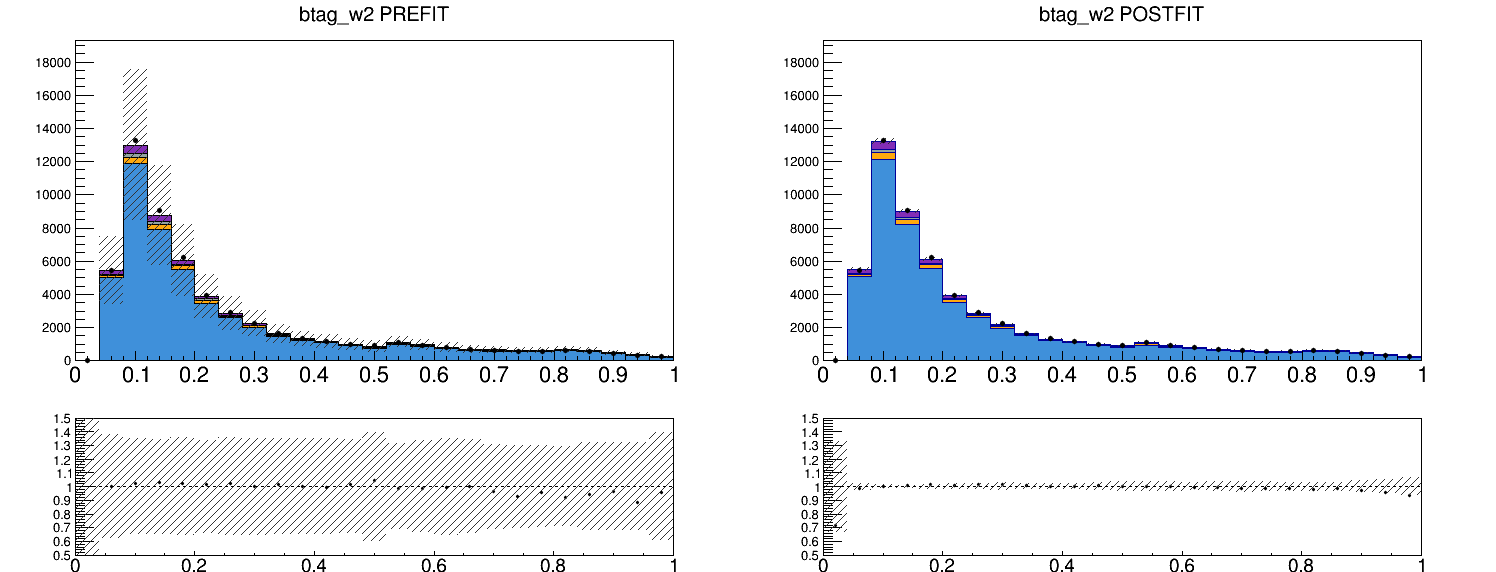

In [14]:
meas, ws = draw_extra_variable_plot("btag_w2")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/btag_btophad_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/btag_btophad_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:

Info in <TCanvas::Print>: png file channel_btag_btophad_histo.png has been created


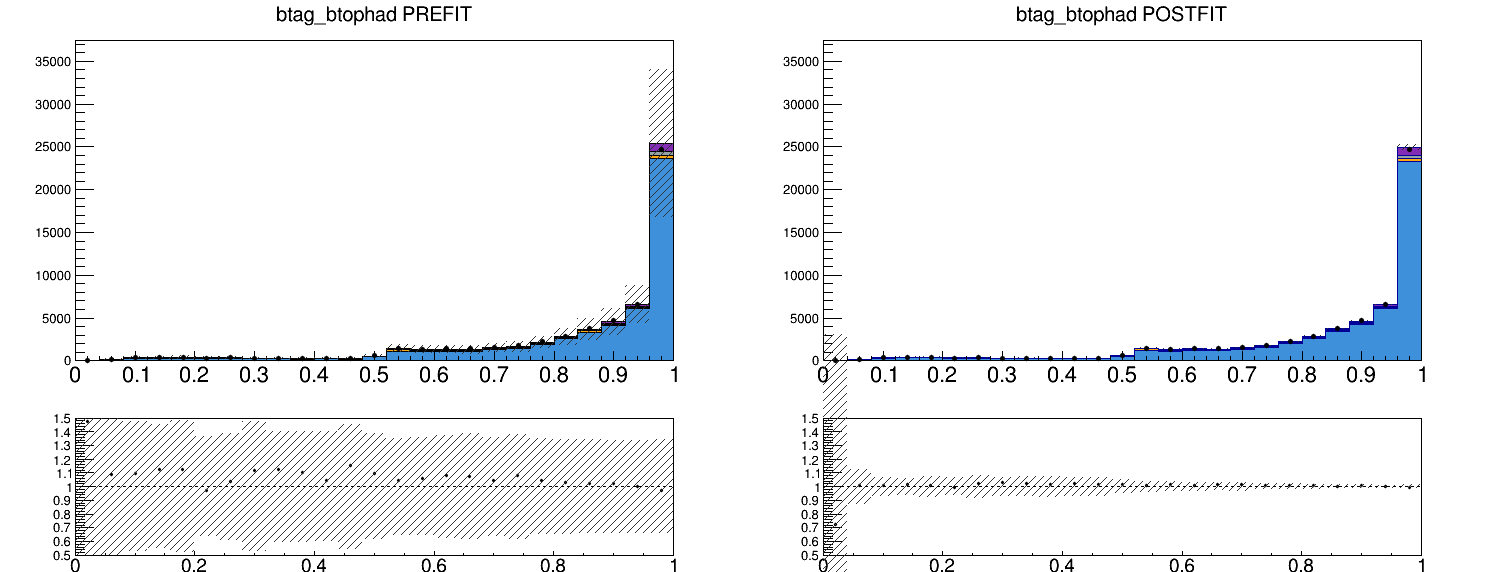

In [15]:
meas, ws = draw_extra_variable_plot("btag_btophad")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/btag_btoplep_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/btag_btoplep_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/btag_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:

Info in <TCanvas::Print>: png file channel_btag_btoplep_histo.png has been created


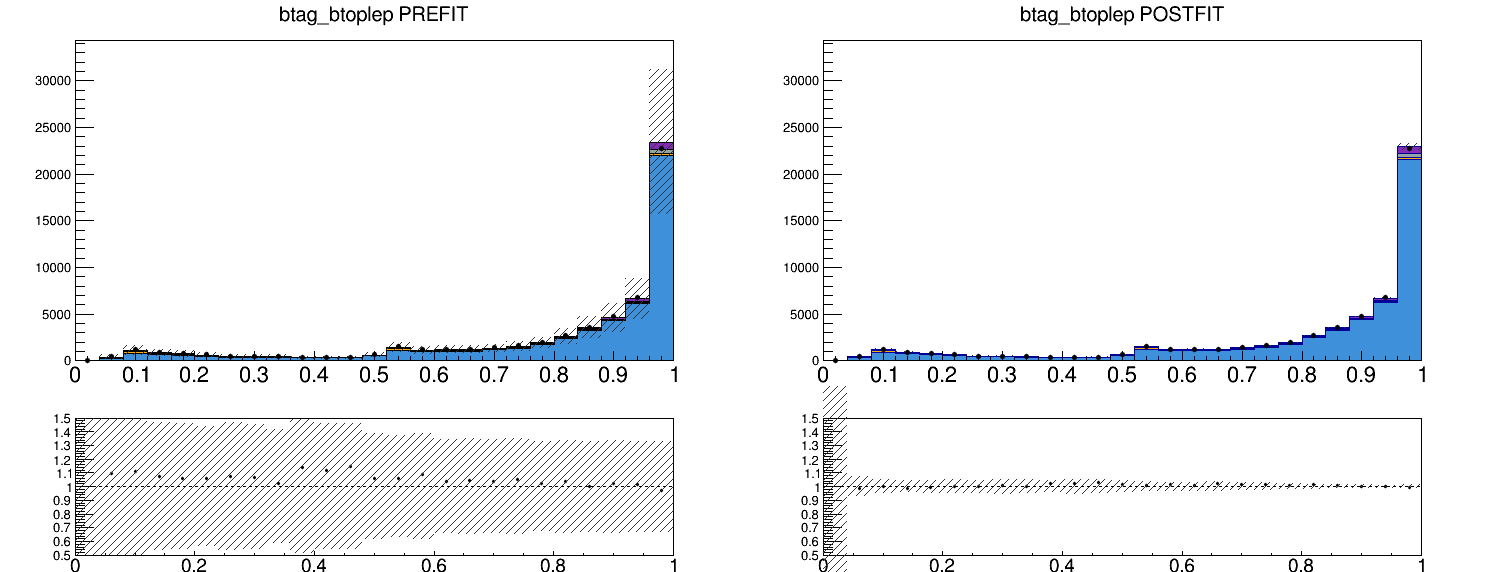

In [16]:
meas, ws = draw_extra_variable_plot("btag_btoplep")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/qgl_w1_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/qgl_w1_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_tt_sca

Info in <TCanvas::Print>: png file channel_qgl_w1_histo.png has been created


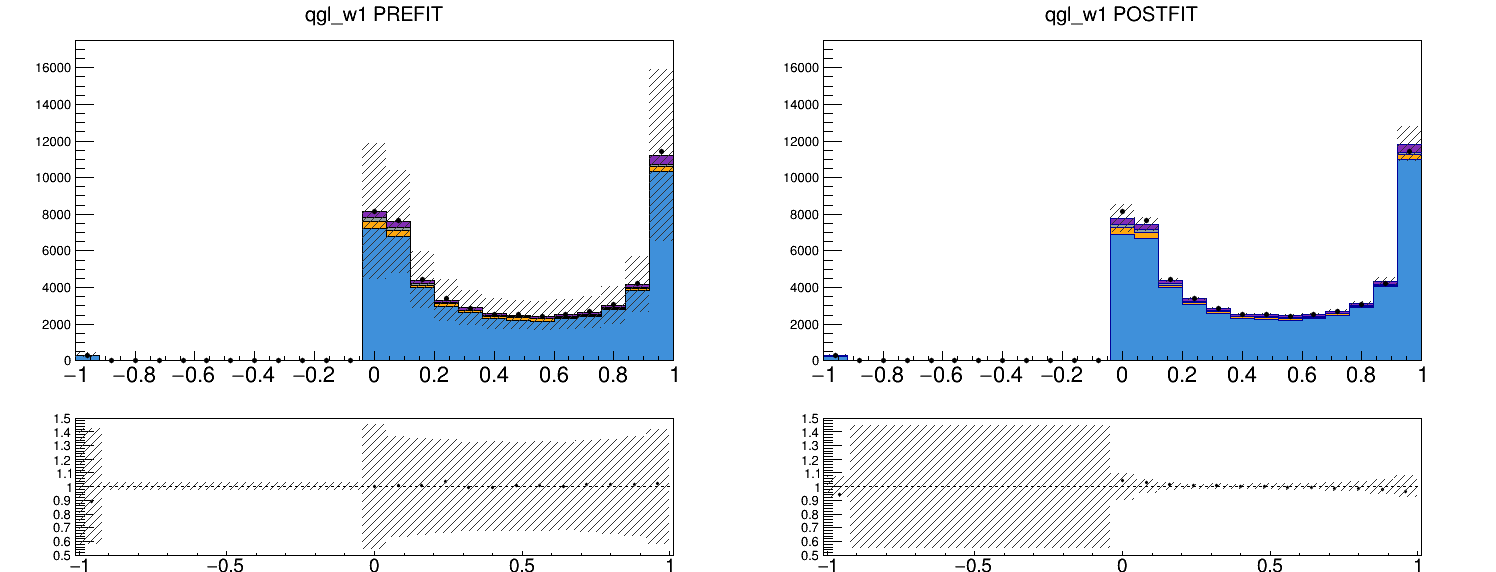

In [17]:
meas, ws = draw_extra_variable_plot("qgl_w1")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/qgl_w2_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/qgl_w2_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_tt_sca

Info in <TCanvas::Print>: png file channel_qgl_w2_histo.png has been created


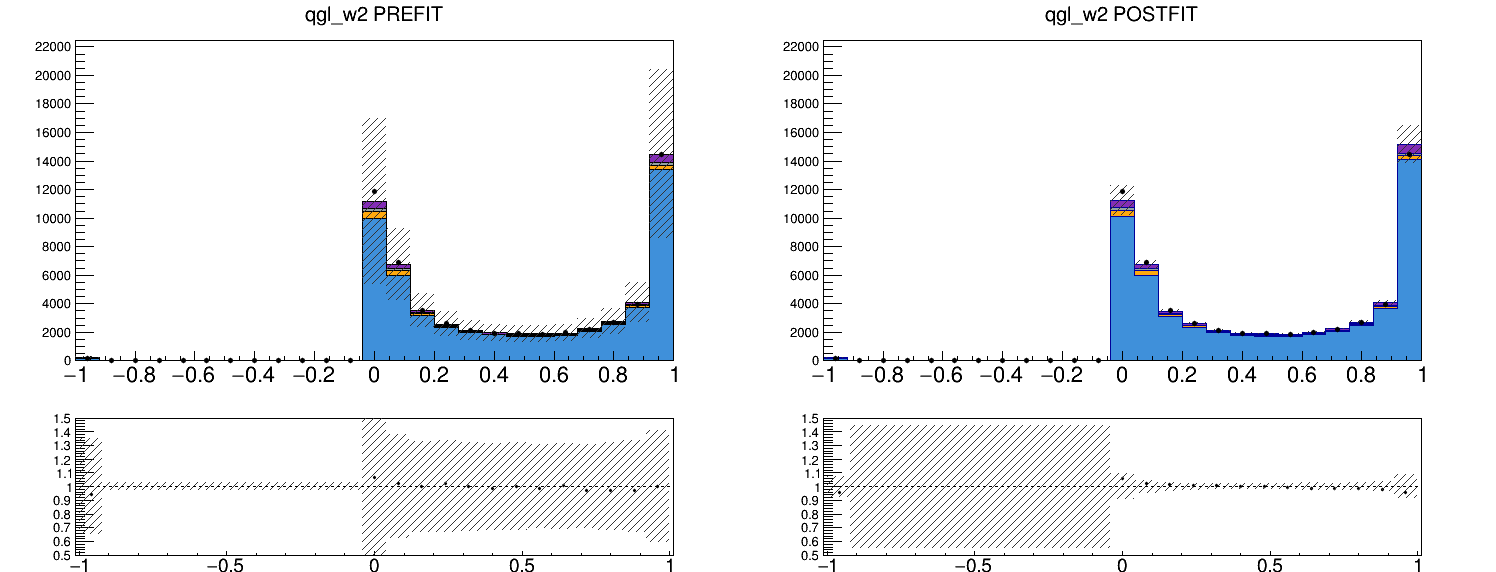

In [18]:
meas, ws = draw_extra_variable_plot("qgl_w2")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/qgl_btophad_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/qgl_btophad_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_tt

Info in <TCanvas::Print>: png file channel_qgl_btophad_histo.png has been created


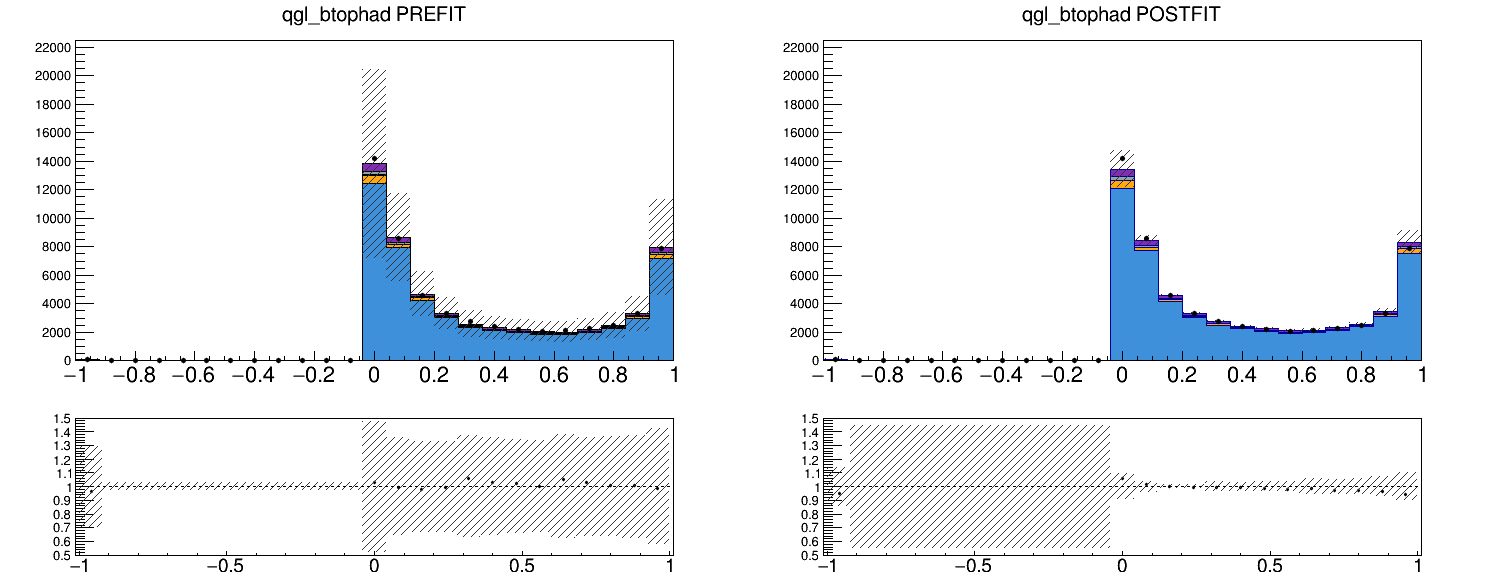

In [19]:
meas, ws = draw_extra_variable_plot("qgl_btophad")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)

[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/qgl_btoplep_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/histograms_ml.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/histograms_ml.root:/qgl_btoplep_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: data/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram data/HistFactoryExtra.root:/qgl_tt

Info in <TCanvas::Print>: png file channel_qgl_btoplep_histo.png has been created


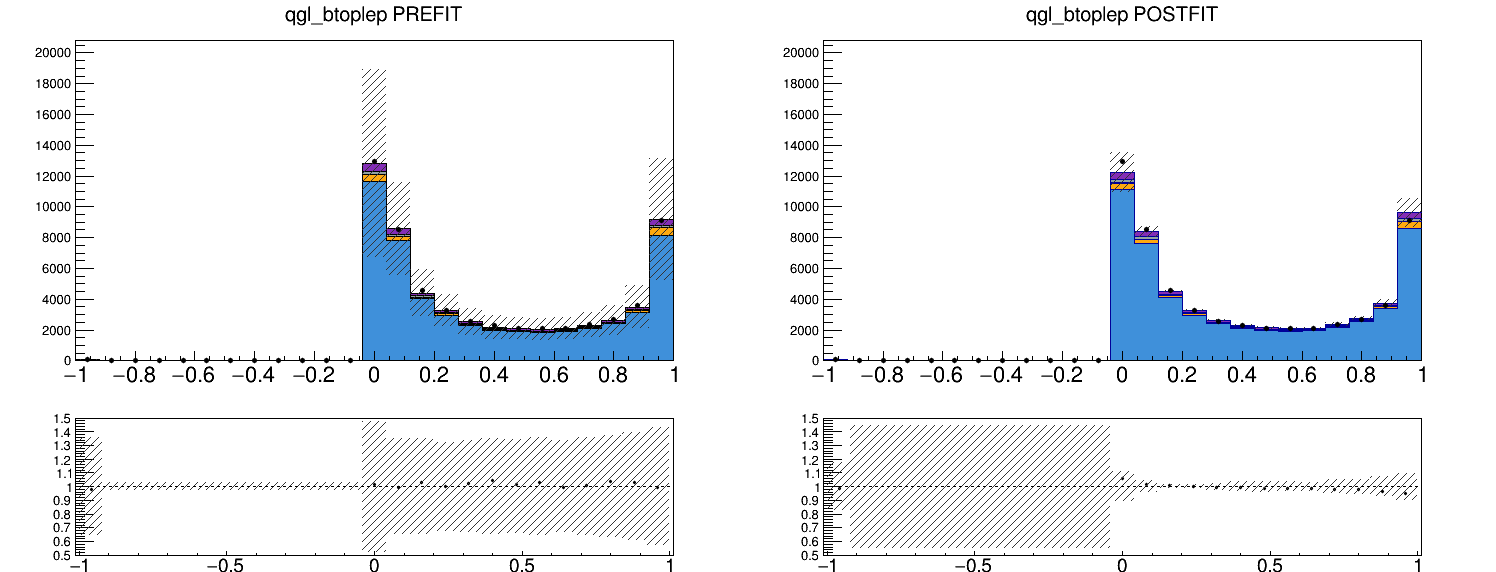

In [20]:
meas, ws = draw_extra_variable_plot("qgl_btoplep")
md = DrawModel(meas, ws) # we have to keep Drawer outside function to be able show picture in jupyter
md.Draw(fit_result, no_fit = True)